In [75]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [77]:
# Define the autoencoder architecture
input_img = keras.Input(shape=(28, 28, 1))
# Encoder
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
# Decoder
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = keras.Model(input_img, decoded)

In [79]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# Step 3: Preprocess the data
# Load the dataset (MNIST)
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
# Normalize and reshape the input images
x_train = x_train.astype('float32') / 255.0
x_train = tf.expand_dims(x_train, axis=-1)
x_test = x_test.astype('float32') / 255.0
x_test = tf.expand_dims(x_test, axis=-1)

In [81]:
# Add noise to the input images
# Add random noise to the training and test images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)
# Clip the values to [0, 1] to avoid pixel values outside this range
x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0.0, clip_value_max=1.0)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0.0, clip_value_max=1.0)

In [83]:
# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train,
 epochs=10,
 batch_size=128,
 shuffle=True,
 validation_data=(x_test_noisy, x_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - loss: 0.2980 - val_loss: 0.1309
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - loss: 0.1285 - val_loss: 0.1195
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - loss: 0.1197 - val_loss: 0.1156
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - loss: 0.1161 - val_loss: 0.1127
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - loss: 0.1136 - val_loss: 0.1108
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.1118 - val_loss: 0.1095
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - loss: 0.1103 - val_loss: 0.1086
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - loss: 0.1094 - val_loss: 0.1076
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - loss: 0.1083 - val_loss: 0.1069
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - loss: 0.1080 - val_loss: 0.1063


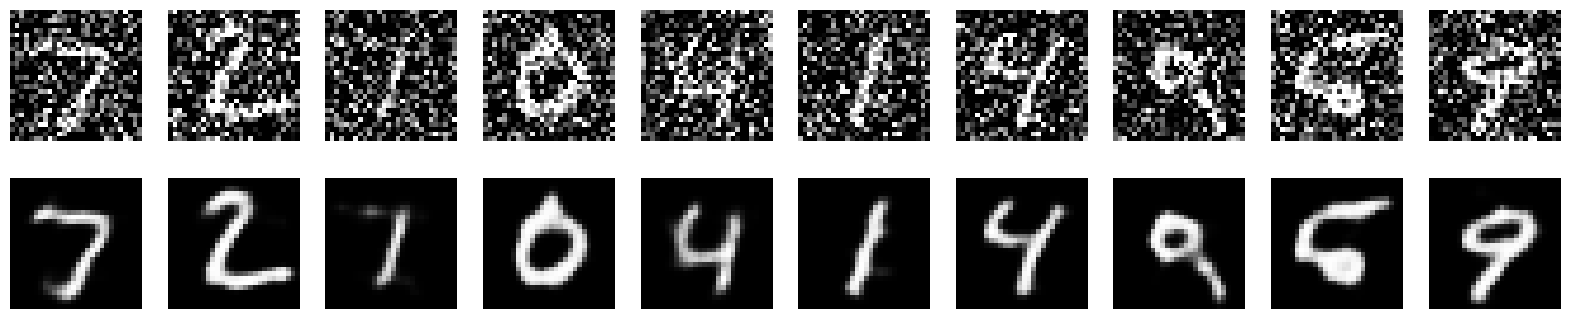

In [90]:
plt.figure(figsize=(20, 4))
for i in range(10):
    # Noisy images
    plt.subplot(2, 10, i + 1)
    plt.imshow(tf.squeeze(x_test_noisy[i]), cmap='gray')  # Fixed squeeze
    plt.axis('off')
    
    # Reconstructed images
    plt.subplot(2, 10, i + 11)
    plt.imshow(tf.squeeze(decoded_imgs[i]), cmap='gray')  # Fixed squeeze
    plt.axis('off')

plt.show()